In [5]:
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import datetime

In [27]:
start = datetime.datetime(2017,1,1)
end = datetime.date.today()

In [29]:
SQM = pdr.get_data_yahoo('SQM', start,end)

Populating the interactive namespace from numpy and matplotlib


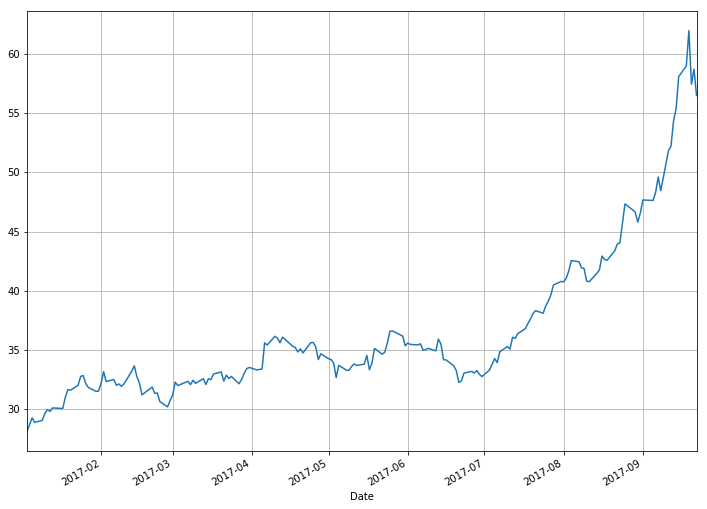

In [30]:
import matplotlib.pyplot as plt
% matplotlib inline
% pylab inline
pylab.rcParams['figure.figsize'] = (12,9)
SQM["Adj Close"].plot(grid = True)   # plot adjusted closing price

In [31]:
FMC = pdr.get_data_yahoo('FMC', start,end)
ALB = pdr.get_data_yahoo('ALB', start,end)
TSLA = pdr.get_data_yahoo('TSLA', start,end)
LIT = pdr.get_data_yahoo('LIT', start,end)

In [48]:
lith_stocks = pd.DataFrame({"SQM": SQM["Adj Close"],
                      "FMC": FMC["Adj Close"],
                      "ALB": ALB["Adj Close"]})
                           #"TSLA":TSLA["Adj Close"],
                           #"LIT": LIT["Adj Close"]})

In [49]:
lith_stocks.head()

,ALB,FMC,SQM
Date,,,
2017-01-03,87.300972,56.750954,28.159159
2017-01-04,89.928436,57.925182,28.686043
2017-01-05,89.621071,58.144104,29.281231
2017-01-06,90.037491,58.034645,28.900702
2017-01-09,89.710304,57.666454,29.066576


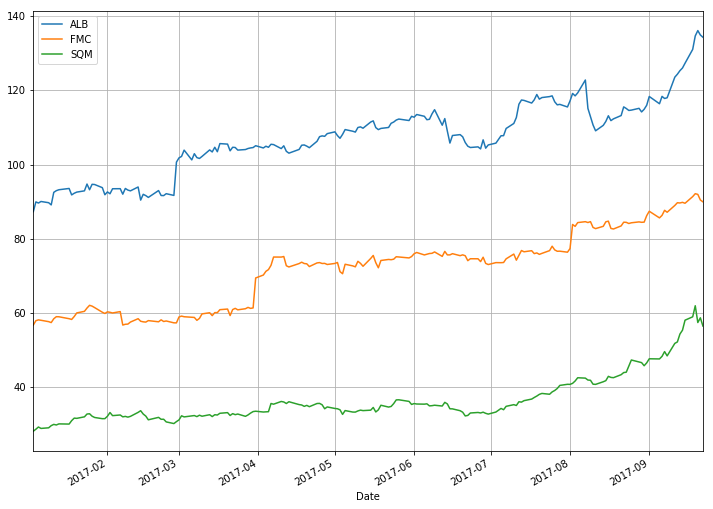

In [50]:
lith_stocks.plot(grid = True)

In [51]:
# Lets now plot the returns
lith_stocks_return = lith_stocks.apply(lambda x:x/x[0])
lith_stocks_return.head()

,ALB,FMC,SQM
Date,,,
2017-01-03,1.000000,1.000000,1.000000
2017-01-04,1.030097,1.020691,1.018711
2017-01-05,1.026576,1.024548,1.039847
2017-01-06,1.031346,1.022620,1.026334
2017-01-09,1.027598,1.016132,1.032225


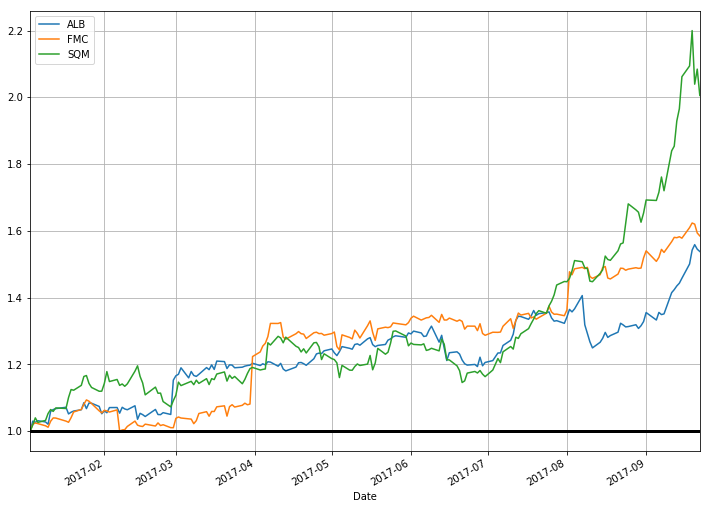

In [57]:
lith_stocks_return.plot(grid = True).axhline(y = 1, color="black", lw = 3)

In [53]:
# Change for each stock per day
import numpy as np
lith_stocks_change = lith_stocks.apply(lambda x:np.log(x) - np.log(x.shift(1))) # shift is used to move it for a day
lith_stocks_change.head()

,ALB,FMC,SQM
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.029653,0.020480,0.018538
2017-01-05,-0.003424,0.003772,0.020536
2017-01-06,0.004636,-0.001884,-0.013081
2017-01-09,-0.003641,-0.006365,0.005723


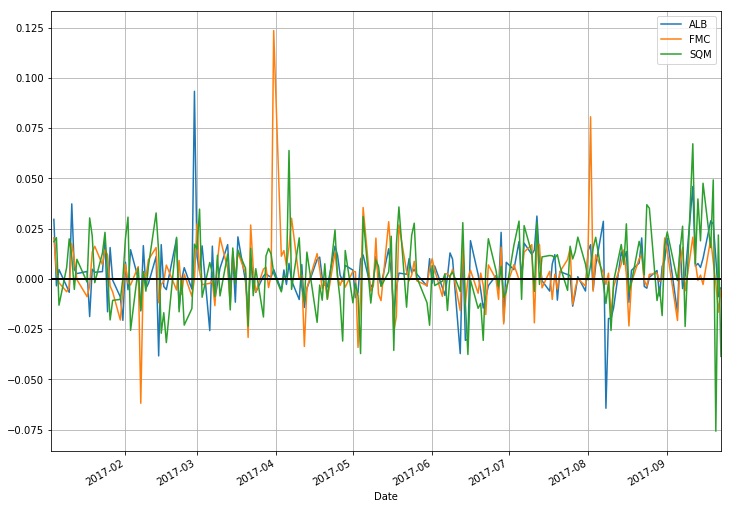

In [56]:
lith_stocks_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

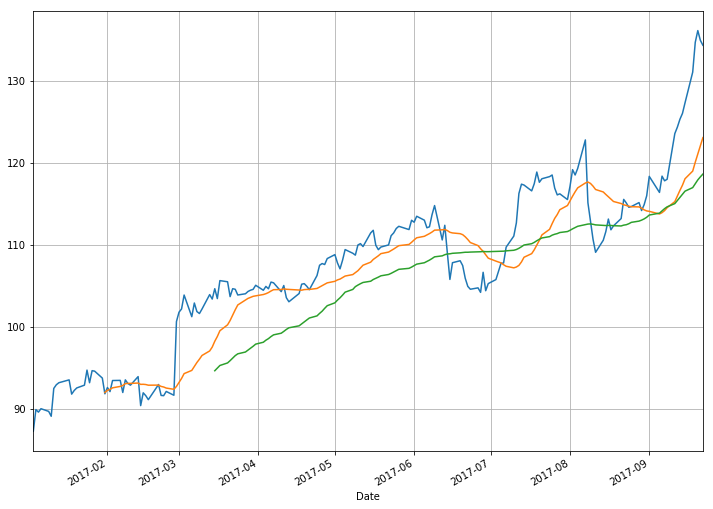

In [61]:
# Moving averages
ALB["20d"] = np.round(ALB["Adj Close"].rolling(window = 20, center = False).mean(), 2)
ALB["50d"] = np.round(ALB["Adj Close"].rolling(window = 50, center = False).mean(), 2)
ALB["200d"] = np.round(ALB["Adj Close"].rolling(window = 200, center = False).mean(), 2)

ALB["Adj Close"].plot(grid = True) #otherseries = ["20d", "50d", "200d"]
ALB["20d"].plot(grid = True)
ALB["50d"].plot(grid = True)